# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Kacper Pastuła

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [38]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [39]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x) * x + x**2
f2 = lambda x: np.sign(x) * x**2
f3 = lambda x: (np.abs(np.sin(5*x)))**3
f4_1 = lambda x: 1 / (1 + x**2)
f4_25 = lambda x: 1 / (1 + 25*x**2)
f4_100 = lambda x: 1 / (1 + 100*x**2)
f5 = lambda x: np.sign(x)


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


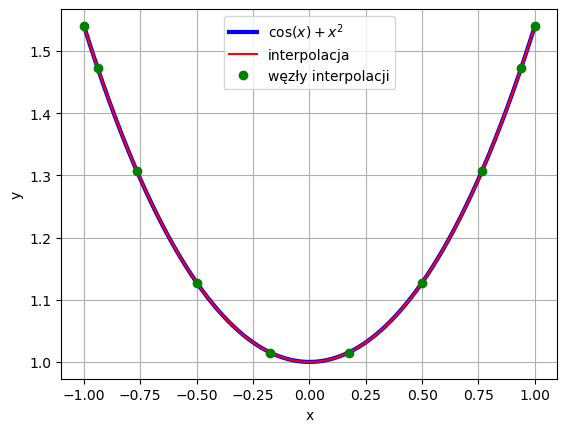

In [3]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

197 μs ± 29.7 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
17.6 ms ± 1.99 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.21 ms ± 58.5 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
17 ms ± 1.42 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
15.8 ms ± 599 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
20.5 ms ± 220 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
365 ms ± 2.4 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
79.4 ms ± 2.68 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
518 ms ± 26.5 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


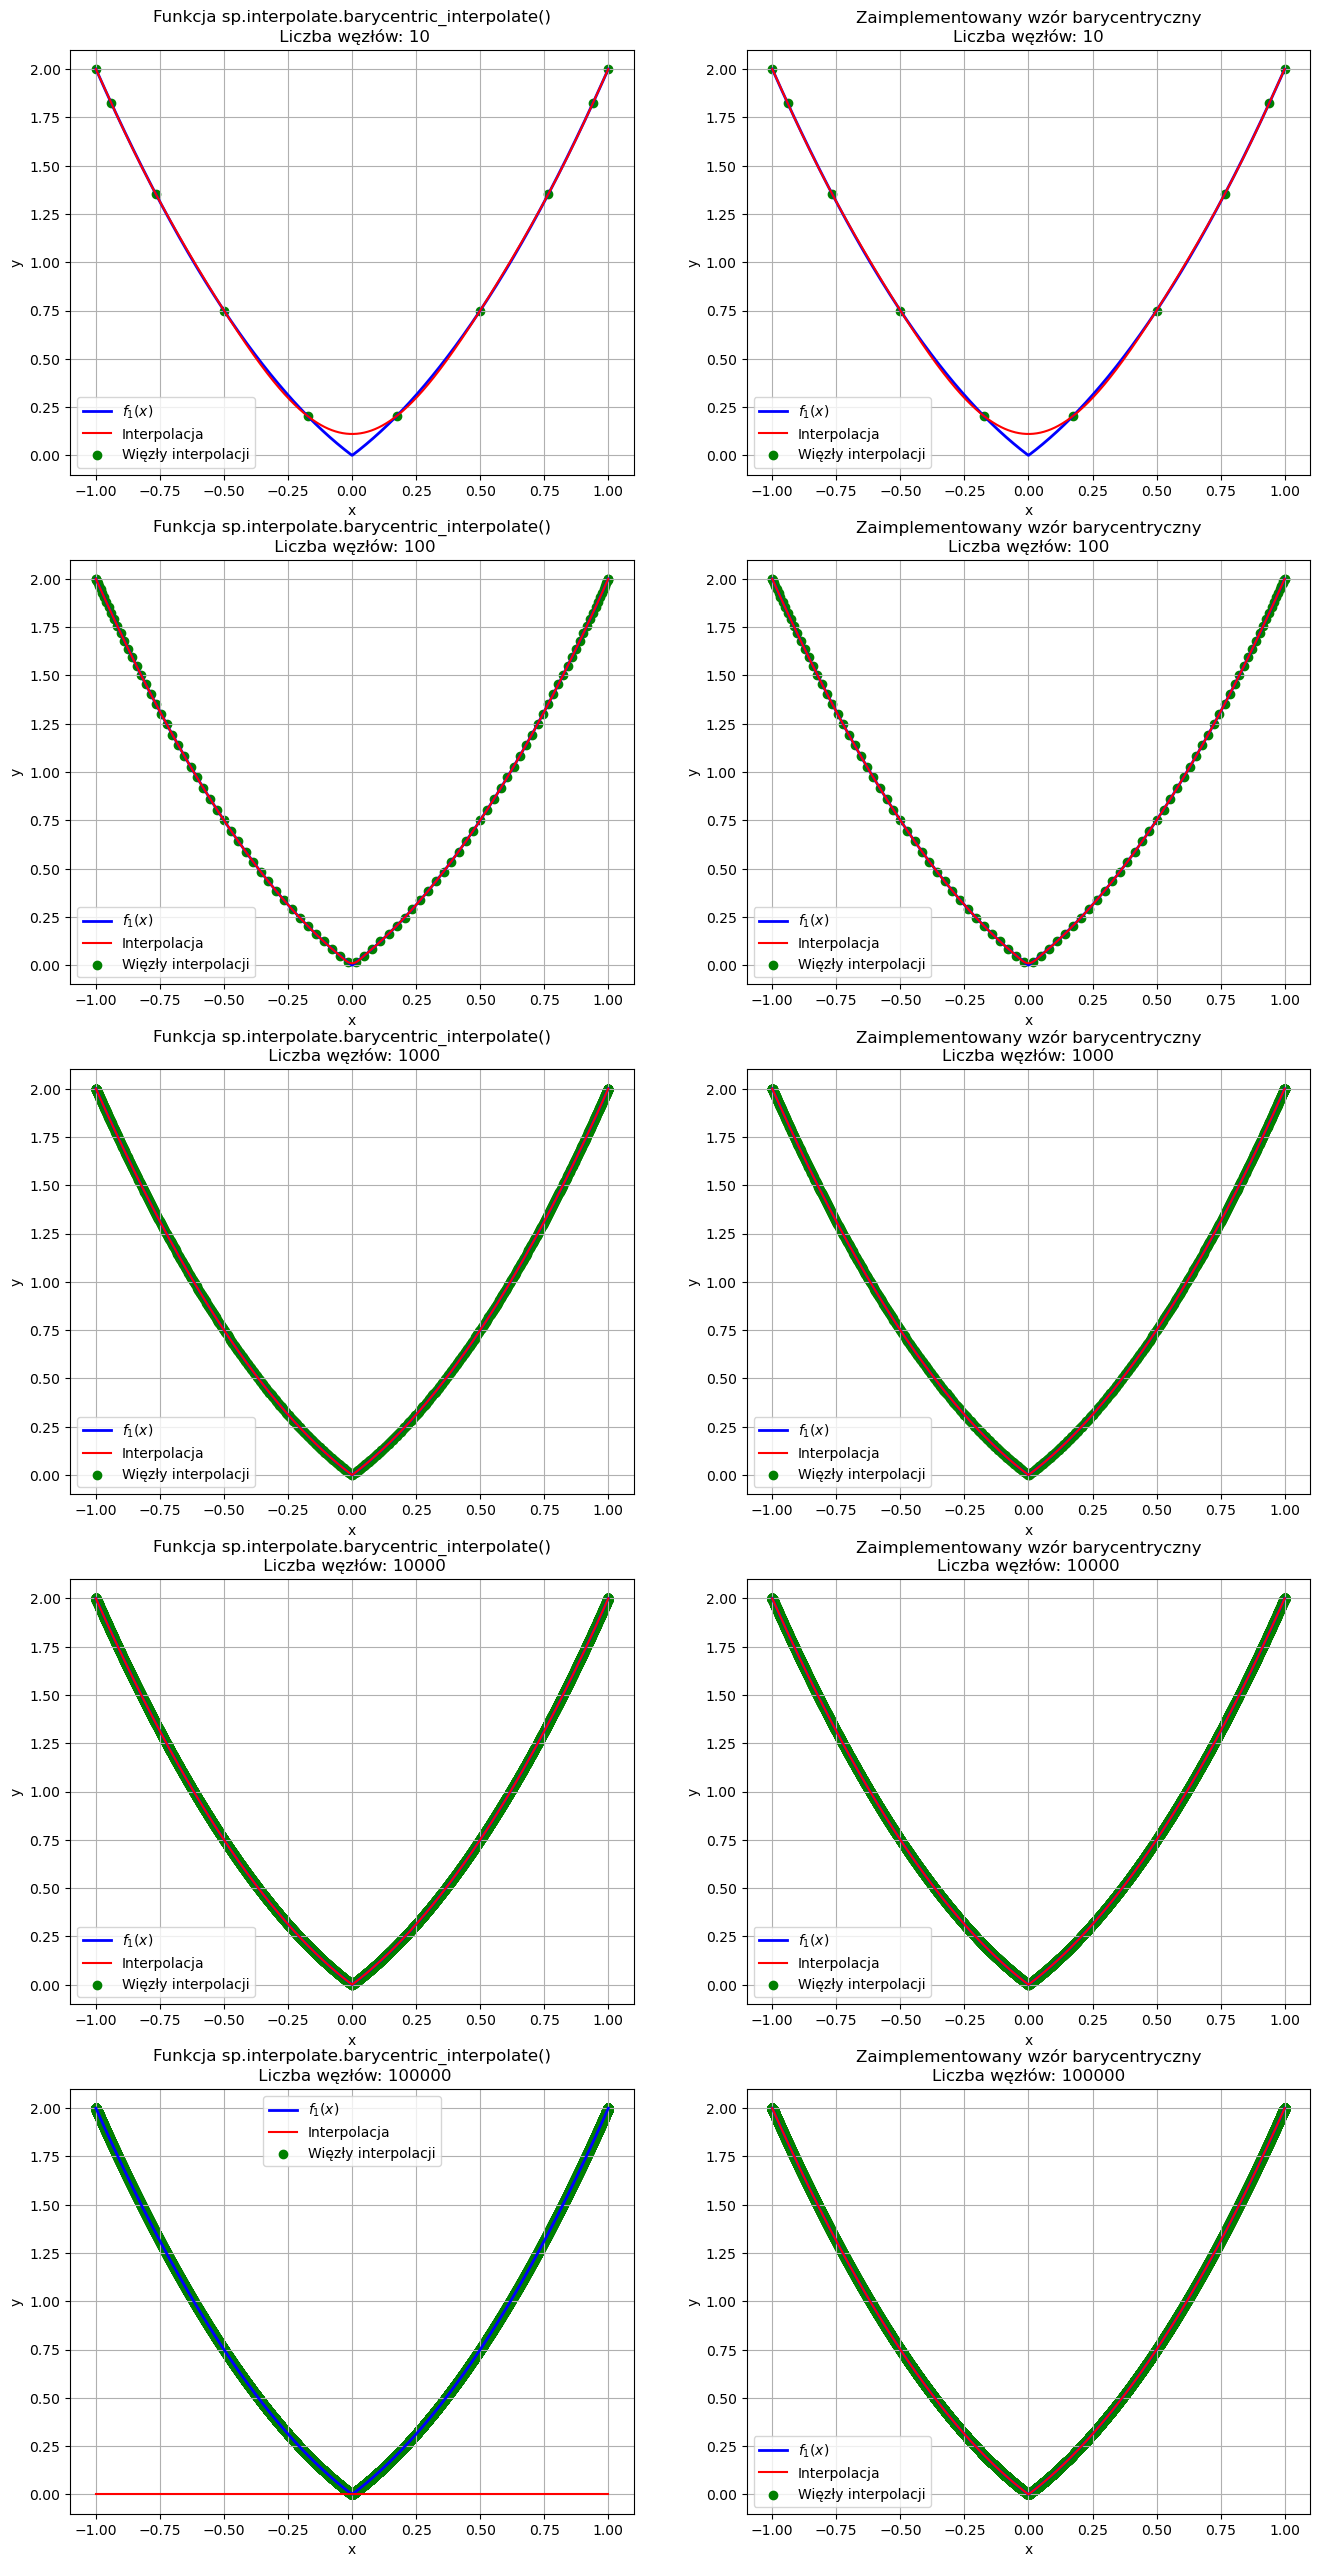

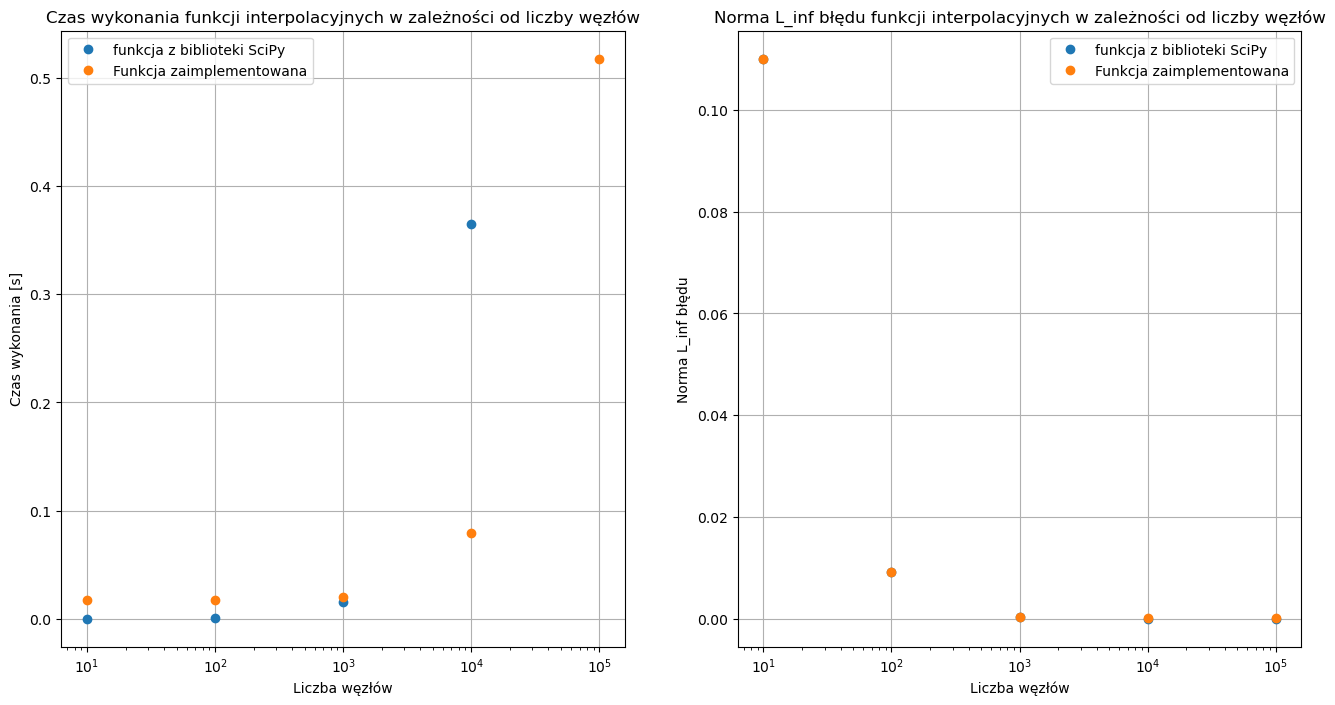

In [18]:
# ===== Twoja implementacja tutaj =====
fig, ax = plt.subplots(5, 2, figsize = (16, 32))
time_sp = []
time_impl = []
norm_sp = []
norm_impl = []
for n in [1, 2, 3, 4, 5]:
    xch = main.chebyshev_nodes(10**n)
    x = np.linspace(-1, 1, 1000)
    # instrukcja warunkowa została zastosowana ponieważ funkcja wbudowana 
    # przy większej ilości więzłów wymaga bardzo dużo czasu
    if 10**n >10000:
        yimp = np.zeros((len(x),1))
        time_sp.append(np.inf)
        norm_sp.append(0) # aby wykres był lepiej czytelny
    else:
        yimp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
        time = %timeit -r 5 -n 10 -o sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
        time_sp.append(time.average)
        norm_sp.append(main.L_inf(yimp, f1(x)))
    time = %timeit -r 5 -n 10 -o main.barycentric_inte(xch, f1(xch), main.bar_cheb_weights(len(xch)),x)
    time_impl.append(time.average)
    
    y_implemented = main.barycentric_inte(xch, f1(xch), main.bar_cheb_weights(len(xch)),x)
    norm_impl.append(main.L_inf(y_implemented, f1(x)))
    ax[n-1][0].plot(x,f1(x), 'b', linewidth=2, label ='$f_1(x)$')
    ax[n-1][1].plot(x,f1(x), 'b', linewidth=2, label ='$f_1(x)$')
    ax[n-1][0].plot(x,yimp, 'r', label='Interpolacja')
    ax[n-1][1].plot(x,y_implemented, 'r', label='Interpolacja')
    ax[n-1][0].scatter(xch, f1(xch),color='g' ,label="Więzły interpolacji")
    ax[n-1][1].scatter(xch, f1(xch),color='g' ,label="Więzły interpolacji")
    ax[n-1][0].legend(loc=0)
    ax[n-1][0].set_title(f'Funkcja sp.interpolate.barycentric_interpolate()\n Liczba węzłów: {10**n}')
    ax[n-1][0].grid()
    ax[n-1][0].set_xlabel('x')
    ax[n-1][0].set_ylabel('y')
    ax[n-1][1].legend(loc=0)
    ax[n-1][1].set_title(f'Zaimplementowany wzór barycentryczny\nLiczba węzłów: {10**n}')
    ax[n-1][1].grid()
    ax[n-1][1].set_xlabel('x')
    ax[n-1][1].set_ylabel('y')
fig, ax = plt.subplots(1,2,figsize=(16,8))
nodes_list = [10, 100, 1000, 10000, 100000]
ax[0].semilogx(nodes_list,time_sp, 'o', label="funkcja z biblioteki SciPy")
ax[0].semilogx(nodes_list,time_impl, 'o',label="Funkcja zaimplementowana")
ax[0].set_xlabel("Liczba węzłów")
ax[0].set_ylabel("Czas wykonania [s]")
ax[0].set_title("Czas wykonania funkcji interpolacyjnych w zależności od liczby węzłów")
ax[0].grid()
ax[0].legend(loc=0)
ax[1].semilogx(nodes_list,norm_sp, 'o', label="funkcja z biblioteki SciPy")
ax[1].semilogx(nodes_list,norm_impl, 'o',label="Funkcja zaimplementowana")
ax[1].set_xlabel("Liczba węzłów")
ax[1].set_ylabel("Norma L_inf błędu")
ax[1].set_title("Norma L_inf błędu funkcji interpolacyjnych w zależności od liczby węzłów")
ax[1].grid()
ax[1].legend(loc=0)

***Do zadania 4***
W tym zadaniu należało przetestować zaimplementowaną poprzednio funkcję przeprowadzającą interpolację metodą barycentryczną pod kątem złożoności czasowej i jakości w zależności od ilości wyznaczonych więzłów oraz porównać ja z wbudowaną w bibliotekę SciPy funcją *barycentic_interpolate()*. Jakość interpolacji mierzymy normą supremum.

Złożoność czasową i jakość badamy tak samo jak na wielu poprzednich zajęciach. Dodatkowo w zadaniu należało wyrysować wykresy z funkcją interpolowaną, interpolacją i wyznaczonymi węzłami Czybyszewa w zależności od ilości węzłów.

**Wnioski:** Przy dużej ilości więzłów (większej niż 10 000) funkcja wbudowana wymaga bardzo dużo czasu, z kolei funkcja zaimplementowana na zajęciach jest pod tym kątem lepsza. Dla mniejszej ilości więzłów szybsza jest funkcja wbudowana, jednak jak widać na wykresie powyżej już pomiędzy $10^3$ a $10^4$ węzłów funkcja stworzona na zajęciach wychodzi na prowadzenie. Norma jest praktycznie identyczna w obu przypadkach, co widać również na wyrysowanych wykresach.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Dla liczby więzłów = 10:
Norma funkcji jednokrotnie różniczkowalnej wynosi 0.0053045866081226495
Norma funkcji trzykrotnie różniczkowalnej wynosi 0.5662005213236176
Dla liczby więzłów = 100:
Norma funkcji jednokrotnie różniczkowalnej wynosi 4.557426970367871e-05
Norma funkcji trzykrotnie różniczkowalnej wynosi 0.0003344001616709107
Dla liczby więzłów = 1000:
Norma funkcji jednokrotnie różniczkowalnej wynosi 1.2400741297158291e-05
Norma funkcji trzykrotnie różniczkowalnej wynosi 1.9345714370455624e-05
Dla liczby więzłów = 10000:
Norma funkcji jednokrotnie różniczkowalnej wynosi 1.934816930637684e-05
Norma funkcji trzykrotnie różniczkowalnej wynosi 3.784809435436465e-05
Dla liczby więzłów = 100000:
Norma funkcji jednokrotnie różniczkowalnej wynosi 1.9901336319350094e-05
Norma funkcji trzykrotnie różniczkowalnej wynosi 4.728395700825949e-05
Dla liczby więzłów = 1000000:
Norma funkcji jednokrotnie różniczkowalnej wynosi 1.998515500400977e-05
Norma funkcji trzykrotnie różniczkowalnej wynosi

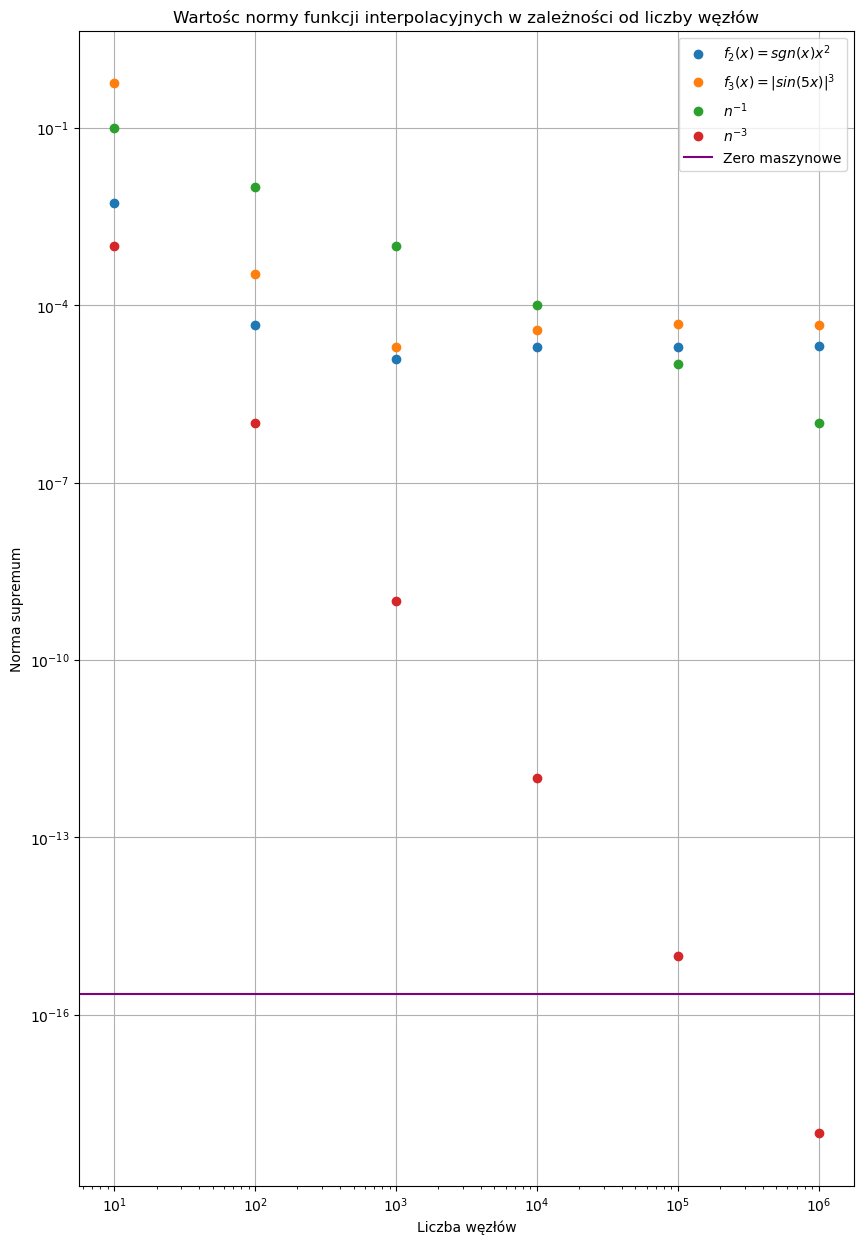

In [40]:
# ===== Twoja implementacja tutaj =====
n_nodes = [10, 100, 1000, 10000, 100000, 1000000]
x = np.linspace(-1, 1, 1000)
epsilon = np.finfo(np.float64).eps #zero maszynowe
norm_f2 = []
norm_f3 = []
n_pow_v_1 = [n ** -1 for n in n_nodes]
n_pow_v_3 = [n ** -3 for n in n_nodes]
for n in n_nodes:
    xch = main.chebyshev_nodes(n)
    y_2 = main.barycentric_inte(xch, f2(xch), main.bar_cheb_weights(len(xch)),x)
    y_3 = main.barycentric_inte(xch, f3(xch), main.bar_cheb_weights(len(xch)),x)
    norm_f2.append(main.L_inf(y_2,f2(x)))
    norm_f3.append(main.L_inf(y_3,f3(x)))
    print(f'Dla liczby więzłów = {n}:')
    print(f'Norma funkcji jednokrotnie różniczkowalnej wynosi {main.L_inf(y_2,f2(x))}')
    print(f'Norma funkcji trzykrotnie różniczkowalnej wynosi {main.L_inf(y_3,f3(x))}')

fig, ax = plt.subplots(figsize=(10,15))
ax.loglog(n_nodes,norm_f2, 'o', label="$f_2(x) = sgn(x)x^2$")
ax.loglog(n_nodes,norm_f3, 'o',label="$f_3(x) = |sin(5x)|^3$")
ax.loglog(n_nodes,n_pow_v_1,'o',label='$n^{-1}$')
ax.loglog(n_nodes,n_pow_v_3,'o',label='$n^{-3}$')
ax.axhline(epsilon,color='purple',label="Zero maszynowe")
ax.set_xlabel("Liczba węzłów")
ax.set_ylabel("Norma supremum")
ax.set_title("Wartośc normy funkcji interpolacyjnych w zależności od liczby węzłów")
ax.grid()
ax.legend()

***Do zadania 5***
Tym razem porównujemy jakość interpolacji dla funkcji jednokrotnie i trzykrotnie różniczkowalnych w zależności od liczby więzłów.

**Wnioski:** Błąd interpolacji zgodnie z przewidywniem zmniejsza się wraz ze zwiększeniem iości więzłów, funkcja jednokrotnie różniczkowalna daje nieco mniejszy błąd.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

In [ ]:
# ===== Twoja implementacja tutaj =====


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)